In [1]:
using Pkg, PerlaTonettiWaugh, Plots
pkg"activate ."

┌ Info: Recompiling stale cache file C:\Users\Chiyoung Ahn\.julia\compiled\v1.0\PerlaTonettiWaugh\Zi3ee.ji for PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1184


# Steady states

## Solving steady state solutions

Set up parameters and find the corresponding stationary solution:

In [2]:
# Define common objects. 
params = parameter_defaults()

settings = settings_defaults()
settings = merge(settings, (global_transition_penalty_coefficient = 1.0, ))
z_grid = settings.z
M = length(z_grid)

d_0 = params.d_0
d_T = params.d_T
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T



# settings = merge(settings, (global_transition_x0 = fill(0.0, length(settings.global_transition_x0)), ))
# params_T = merge(params, (d = d_0,))


# solve for stationary solution at t = 0
stationary_sol_0 = stationary_numerical(params_0, z_grid) # solution at t = 0
stationary_sol = stationary_numerical(params_T, z_grid) # solution at t = T

Ω_0 = stationary_sol_0.Ω;
Ω_T = stationary_sol.Ω;

## Welfare in steady states

### Steady state at `T`

In [3]:
display_stationary_sol(stationary_sol);

g = 0.020615710253102364
z_hat = 1.4039337090190345
Ω = 1.2562899003237646
π_bar_agg = 0.24067321660408486
y = 1.3124933028572352
c = 1.3124933028572352
λ_ii = 0.7552342507090134
U_bar(0.0) = 65.1357062770389
L_tilde = 0.2099540490178484
z_bar = 1.661287297562375
w = 0.41640447602826725
x = 1.0
π_min = 0.057942557180211345
r = 0.09361571025310236
a = 9.160936798927867
b = 0.1424454938003916
S = 0.03389742154659973


### Steady state at `0`

In [4]:
display_stationary_sol(stationary_sol_0);

g = 0.010930652403331097
z_hat = 1.813536131626652
Ω = 1.7797899977898557
π_bar_agg = 0.2599434439084752
y = 1.4215794009183362
c = 1.4215794009183362
λ_ii = 0.8982453618545706
U_bar(0.0) = 44.915056392558874
L_tilde = 0.19292029410354766
z_bar = 1.7613866270362195
w = 0.44149454256973625
x = 1.0
π_min = 0.04969310649379504
r = 0.0839306524033311
a = 12.468098351241073
b = 0.1490608571684243
S = -0.011680460694423862


# Transition dynamics

Setup for optimizer:

In [5]:
settings = merge(settings, (params_T = params_T, stationary_sol_T = stationary_sol, Ω_0 = Ω_0));

Find the corresponding solution:

In [6]:
# result = solve_full_model_global(settings);
using BenchmarkTools
result = solve_full_model_nlopt(settings)

(solution = (results = 25×15 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row │ t        │ g         │ z_hat   │ Ω       │ E         │ v_0     │
│     │ Float64  │ Float64   │ Float64 │ Float64 │ Float64   │ Float64 │
├─────┼──────────┼───────────┼─────────┼─────────┼───────────┼─────────┤
│ 1   │ 0.0      │ 0.0155988 │ 1.51188 │ 1.77979 │ 0.0227425 │ 1.15531 │
│ 2   │ 0.326429 │ 0.0157658 │ 1.50869 │ 1.76242 │ 0.0231826 │ 1.15596 │
│ 3   │ 1.91118  │ 0.0165824 │ 1.49332 │ 1.68399 │ 0.0253954 │ 1.15888 │
│ 4   │ 3.49593  │ 0.0173062 │ 1.47985 │ 1.61505 │ 0.0279274 │ 1.16012 │
│ 5   │ 5.08068  │ 0.0178542 │ 1.46824 │ 1.55569 │ 0.0308716 │ 1.15999 │
│ 6   │ 6.5515   │ 0.018174  │ 1.45917 │ 1.50915 │ 0.0338456 │ 1.15936 │
│ 7   │ 8.02232  │ 0.0183754 │ 1.45136 │ 1.47033 │ 0.0366385 │ 1.15869 │
│ 8   │ 9.49314  │ 0.01868   │ 1.44433 │ 1.43767 │ 0.0386735 │ 1.15886 │
│ 9   │ 10.964   │ 0.0190628 │ 1.43825 │ 1.40935 │ 0.0402726 │ 1.15944 │
│ 10  │ 12.4348  │ 0.0192103 │ 1.43314 │ 1.

In [7]:
solved = result.solution;
E_nodes = result.E_nodes;

In [8]:
println("E_nodes (sorted) : ")
sort(E_nodes)

E_nodes (sorted) : 


14-element Array{Float64,1}:
 -0.8964374465044729  
 -0.7746468930197512  
 -0.6181238633755806  
 -0.4590830160784599  
 -0.36019124860350715 
 -0.25307706236558936 
 -0.23286682220067356 
 -0.12596548498833543 
 -0.09644018120120594 
 -0.08995488440322305 
 -0.05493083578421171 
 -0.04448797373514855 
 -0.03083485143841519 
 -0.029510438570305046

## Plots for Ω and `entry_residuals`

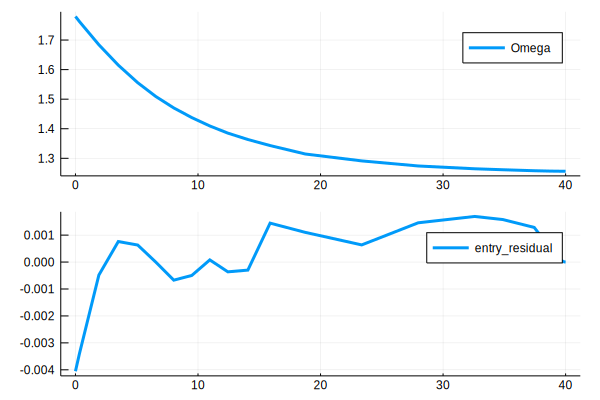

In [9]:
solved = solved.results;
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

## Primary Plots

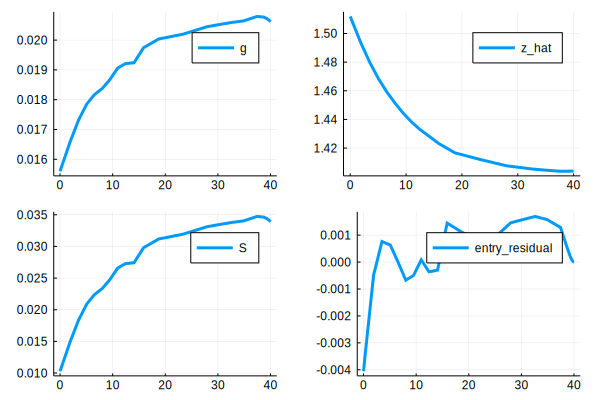

In [10]:
plot1 = plot(solved.t, solved.g, label = "g", lw = 3)
plot2 = plot(solved.t, solved.z_hat, label = "z_hat", lw = 3)
plot3 = plot(solved.t, solved.S, label = "S", lw = 3)
plot4 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2))

## Static Equations

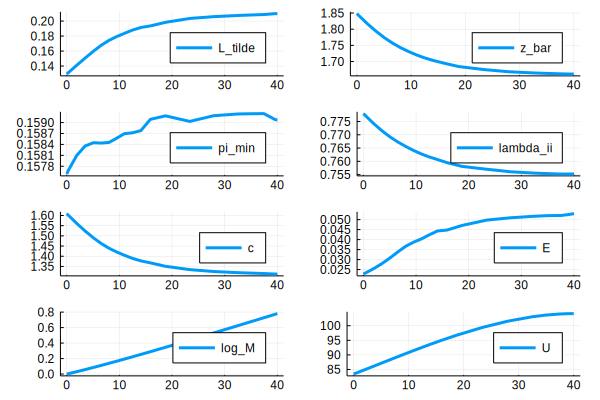

In [11]:
plot1 = plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)
plot3 = plot(solved.t, solved.π_min, label = "pi_min", lw = 3)
plot4 = plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(solved.t, solved.c, label = "c", lw = 3)
plot6 = plot(solved.t, solved.E, label = "E", lw = 3)
plot7 = plot(solved.t, solved.log_M, label = "log_M", lw = 3)
plot8 = plot(solved.t, solved.U, label = "U", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, layout=(4,2))

# Welfare analysis

### `log_M(t)`

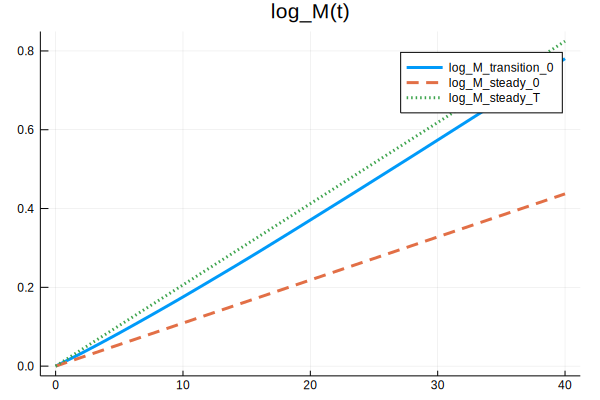

In [12]:
# define log_M with steady state g
log_M_steady_0(t) = stationary_sol_0.g * t
log_M_steady_T(t) = stationary_sol.g * t

# generate the plot!
plot(solved.t, 
    [solved.log_M, log_M_steady_0, log_M_steady_T], 
    label = ["log_M_transition_0", "log_M_steady_0", "log_M_steady_T"] ,
    title = "log_M(t)", linestyle = :auto, lw = 3)

### `Ω(t)`

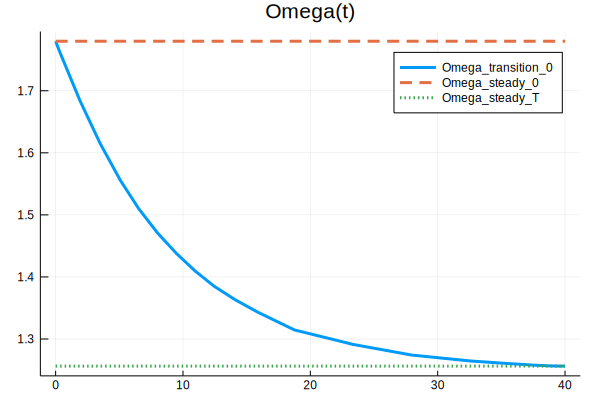

In [13]:
# define Ω function (constant)
Ω_steady_0(t) = stationary_sol_0.Ω
Ω_steady_T(t) = stationary_sol.Ω

# generate the plot!
plot(solved.t, 
    [solved.Ω, Ω_steady_0, Ω_steady_T], 
    label = ["Omega_transition_0", "Omega_steady_0", "Omega_steady_T"] ,
    title = "Omega(t)", linestyle = :auto, lw = 3)

### `c(t)`

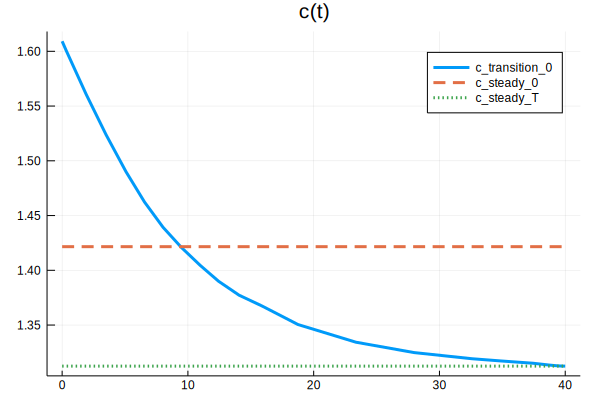

In [14]:
# define c function (constant)
c_steady_0(t) = stationary_sol_0.c
c_steady_T(t) = stationary_sol.c

# generate the plot!
plot(solved.t, 
    [solved.c, c_steady_0, c_steady_T], 
    label = ["c_transition_0", "c_steady_0", "c_steady_T"] ,
    title = "c(t)", linestyle = :auto, lw = 3)

### `U(t)`

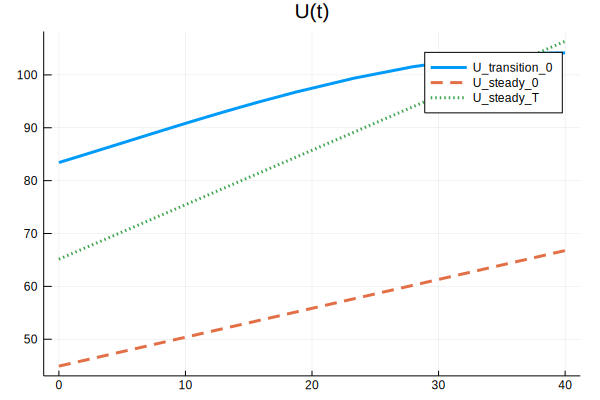

In [15]:
# generate the plot!
plot(solved.t, 
    [solved.U, stationary_sol_0.U_bar, stationary_sol.U_bar], 
    label = ["U_transition_0", "U_steady_0", "U_steady_T"] ,
    title = "U(t)", linestyle = :auto, lw = 3)

## Consumption equivalent for search threshold (`M(0)`)
See computational appendix for details.

### `M(0)` by two steady states (autarky and steady state at `T`)

In [16]:
T = solved.t[end]
consumption_equivalent(solved.U[end], stationary_sol_0.U_bar(T), params)

2.1119235394816793

### `M(0)` by autarky and transition from `t=0`

In [17]:
T = solved.t[end]
consumption_equivalent(solved.U[1], stationary_sol_0.U_bar(T), params)

1.39504501212406